# Introduction to the tidyverse
The [tidyverse](https://www.tidyverse.org/) is an opinionated collection of $\texttt{R}$ packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures.

![tidyverse](fig/tidyverse.jpg "title-1")

And you can load all of these packages with a simple command

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


As the messages and warnings suggest, by loading tidyverse we are actually loading a *set of packages*: ggplot2, dplyr, tidyr...

### The Pipe operator

We are going to do a quick overview of some of these packages, but first you need to make friends with the **pipe** operator (**%>%** <- this guy here!). 

The pipe operator (also known out of the $\texttt{R}$ world as **|**) was first introduced in the $\texttt{R}$ world by the developers of the **magrittr** package:

![Magrittr](fig/magrittr.png "title-1")

This operator allows to concatenate an $\texttt{R}$ value or the result of an $\texttt{R}$ function with other $\texttt{R}$ functions, the value on the left of the **%>%** will be interpreted as the first value for the function on its right:

In [2]:
names(mtcars)
head(mtcars, n = 5)
mean(rnorm(100))

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] -0.02756694

can be rewritten using a **%>%** as follows:

In [3]:
mtcars %>% names
mtcars %>% head(n = 5)
rnorm(10) %>% mean

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] 0.2203475

*sooo...what*? Obviously....with more than one *pipe* you can build a *pipeline*...

What if we'd like to take the **5** cars with the highest mpg values, add a standard normal noise and plot it all?

Here is a way to do it without a pipeline:

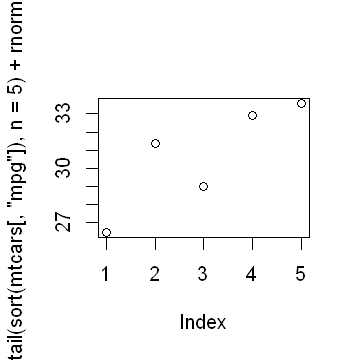

In [4]:
options(repr.plot.width=3, repr.plot.height=3) ### set a small plot size
plot(tail(sort(mtcars[, "mpg"]), n = 5) + rnorm(5))

And here is a way to get the same result with a *pipeline*:

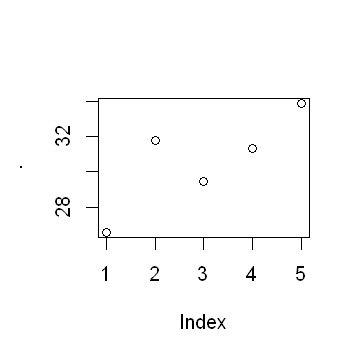

In [5]:
mtcars %>% pull(mpg) %>% sort %>% tail(n = 5) %>% `+`(rnorm(5)) %>% plot

*P.S.* here we used a trick: you can call operator functions like **+**, **-**, **\***, **/** and many others, simply by including them between two backticks \`\` (in Windows you can type a backtick using the key combination ALT+96)

One last thing about **%>%**... it works even if we want the value on the left of the pipe to be **not the first argument** of the function on the right of it. We can use the point **.** as placeholder, for example this linear regression:

In [6]:
lm(mpg ~ cyl, mtcars)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


can be *pipelinezed* as:

In [7]:
mtcars %>% lm(mpg ~ cyl, .)


Call:
lm(formula = mpg ~ cyl, data = .)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


### DPLYR

After the pipe operator, we can start with the first useful package of the tidyverse, **dplyr**:

![DPLYR](fig/dplyr_small.png "title-1")

This package is the *de-facto* standard for data manipulation in modern R.

It consists of *single table* verbs to manipulate a single table:


In [8]:
mtcars %>% sample_n(5) -> smcars # randomly choose five cars
smcars %>% pull(cyl) %>% max -> max_cyl
max_cyl
smcars
smcars %>% filter(cyl == max_cyl) # choose cars with six cylinders
smcars %>% arrange(desc(hp)) # arrange the cars by descending horse power
smcars %>% select(carb, cyl) # select only two columns of the datasets
smcars %>% rename(cylinder = cyl, horsepower = hp) # rename some variable
smcars %>% mutate(cyl = 2 * cyl, tot = am + gear + carb) # create new columns or modify old ones
smcars %>% summarise(mean_hp = mean(hp))

[1] 8

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15.2,8,275.8,180,3.07,3.78,18.00,0,0,3,3
18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


,carb,cyl
Merc 280C,4,6
Merc 450SLC,3,8
Toyota Corolla,1,4
Hornet Sportabout,2,8
Merc 280,4,6


,mpg,cylinder,disp,horsepower,drat,wt,qsec,vs,am,gear,carb
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,tot
17.8,12,167.6,123,3.92,3.440,18.90,1,0,4,4,8
15.2,16,275.8,180,3.07,3.780,18.00,0,0,3,3,6
33.9,8,71.1,65,4.22,1.835,19.90,1,1,4,1,6
18.7,16,360.0,175,3.15,3.440,17.02,0,0,3,2,5
19.2,12,167.6,123,3.92,3.440,18.30,1,0,4,4,8


mean_hp
133.2


Then there is the **group_by** operation to change the way in which some *single table verbs* are applied to the table:

In [9]:
mtcars %>% group_by(cyl) %>% summarise(hp = mean(hp)) # mean hp for each cyl value
mtcars %>% group_by(cyl) %>% sample_n(2) # randomly choose two samples for each cyl value
mtcars %>% group_by(cyl) %>% mutate(mean_hp_by_cyl = mean(hp)) %>% arrange(desc(cyl)) %>% sample_n(1) # what does it do? 

cyl,hp
4,82.63636
6,122.28571
8,209.21429


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mean_hp_by_cyl
24.4,4,146.7,62,3.69,3.19,20.00,1,0,4,2,82.63636
19.7,6,145.0,175,3.62,2.77,15.50,0,1,5,6,122.28571
13.3,8,350.0,245,3.73,3.84,15.41,0,0,3,4,209.21429


There are also *two tables verbs*, in particular **joins**, to combine the contents of two tables:

In [10]:
mtcars$name <- rownames(mtcars)
mtcars_table_1 <- mtcars %>% select(name, hp) %>% head(n = 10)
mtcars_table_2 <- mtcars %>% select(name, cyl,hp) %>% head(n = 10) %>% sample_n(5) %>%  mutate(hp = 2 * hp)

mtcars_table_1
mtcars_table_2

mtcars_table_1 %>% left_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_1 %>% right_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_2 %>% inner_join(mtcars_table_1, by = "name", suffix = c("_two", "_one"))

,name,hp
Mazda RX4,Mazda RX4,110
Mazda RX4 Wag,Mazda RX4 Wag,110
Datsun 710,Datsun 710,93
Hornet 4 Drive,Hornet 4 Drive,110
Hornet Sportabout,Hornet Sportabout,175
Valiant,Valiant,105
Duster 360,Duster 360,245
Merc 240D,Merc 240D,62
Merc 230,Merc 230,95
Merc 280,Merc 280,123


name,cyl,hp
Datsun 710,4,186
Merc 280,6,246
Mazda RX4,6,220
Mazda RX4 Wag,6,220
Duster 360,8,490


name,hp_one,cyl,hp_two
Mazda RX4,110,6,220
Mazda RX4 Wag,110,6,220
Datsun 710,93,4,186
Hornet 4 Drive,110,NA,NA
Hornet Sportabout,175,NA,NA
Valiant,105,NA,NA
Duster 360,245,8,490
Merc 240D,62,NA,NA
Merc 230,95,NA,NA
Merc 280,123,6,246


name,hp_one,cyl,hp_two
Datsun 710,93,4,186
Merc 280,123,6,246
Mazda RX4,110,6,220
Mazda RX4 Wag,110,6,220
Duster 360,245,8,490


name,cyl,hp_two,hp_one
Datsun 710,4,186,93
Merc 280,6,246,123
Mazda RX4,6,220,110
Mazda RX4 Wag,6,220,110
Duster 360,8,490,245


There is a lot more about **dplyr**, we have no more time, but you do! So here are some links:

* [Window functions](https://cran.r-project.org/web/packages/dplyr/vignettes/window-functions.html) to compute cumulative sums, means or build rankings among observations
* More [two table verbs](https://cran.r-project.org/web/packages/dplyr/vignettes/two-table.html) to compute, for example, unions, intersections, and symmetric differences between tables
* [Deep dive](https://cran.r-project.org/web/packages/dplyr/vignettes/programming.html) in the way **dplyr** is built and how to effectively use it to write custom verbs
* How to use dplyr as a frontend to standard databases ([dbplyr](https://cran.r-project.org/web/packages/dbplyr/index.html)) or big data stacks ([sparklyr](http://spark.rstudio.com/dplyr/))

### GGPLOT

Another great package in tidyverse is **[ggplot](http://ggplot2.org/)**, a versatile plotting system. The full introduction to this package is out of the scope of this lesson (but it's covered by the QC R course!).

![ggplot](fig/ggplot.png "title-1")

Howevere, since in the following lessons we are going to use ggplot extensively, if you have some doubts on its functioning let us know! :)

The following is an example of its capabilities:

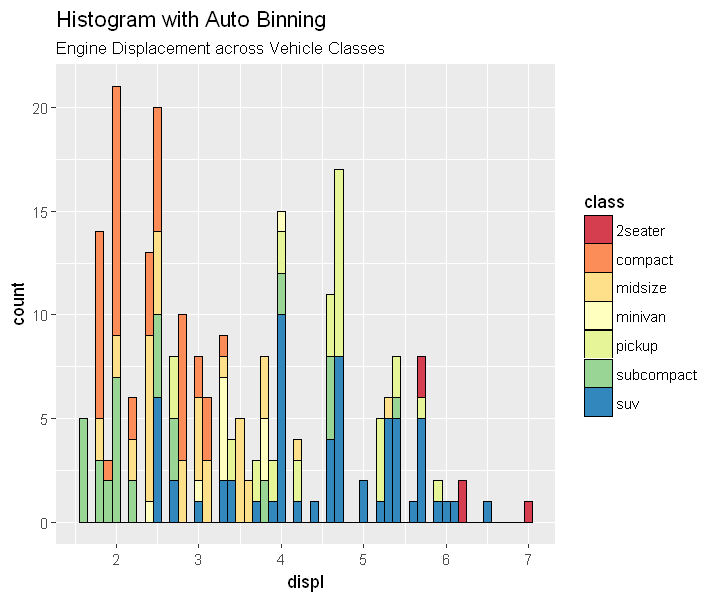

In [11]:
options(repr.plot.width=6, repr.plot.height=5) ### back to the normal plot size

mpg %>%  ggplot(aes(displ)) + scale_fill_brewer(palette = "Spectral") + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning", 
       subtitle="Engine Displacement across Vehicle Classes")  

### TIDYR

![ggplot](fig/tidyr.jpg "title-1")

The **tidyr** package provides a set of functions to help transforming messy data into [tidy data](https://tidyr.tidyverse.org/articles/tidy-data.html). As you can see from the previous link, the definition of tidy data is quite verbose and out of the scope of this lesson (but it's important!).

Here we focus on the functions that allow you to transform data from the *wide* format to the *long* one:

![gather](fig/gather.png "title-1")

The two datasets in the figure have the same content but the left one has the *long* format while the right one has the *wide* format.

Consider this dataset:

In [12]:
small_iris <- iris %>% head(n = 5) %>% select(-Species) %>% mutate(index = 1:n())
small_iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,index
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,2
4.7,3.2,1.3,0.2,3
4.6,3.1,1.5,0.2,4
5.0,3.6,1.4,0.2,5


This dataset is in the wide format (dense representation), with one column for each variable. If you want to transform it in the long format you can use the tidyr function **gather**:

In [13]:
small_iris_long <- small_iris %>% gather(variable, value, -index)
small_iris_long

index,variable,value
1,Sepal.Length,5.1
2,Sepal.Length,4.9
3,Sepal.Length,4.7
4,Sepal.Length,4.6
5,Sepal.Length,5.0
1,Sepal.Width,3.5
2,Sepal.Width,3.0
3,Sepal.Width,3.2
4,Sepal.Width,3.1
5,Sepal.Width,3.6


As you can see, in the *long* format there are two columns (variable and value: the two parameters of the **gather** function) plus the columns that are **NOT** selected in the third parameters. By setting *-index* as the last parameter of gather, we are telling it to reshape all the columns except *index* to the *long* format.

If we have a *long* dataframe and we want to reshape it into the *wide* format we can use the **spread** function, as follows:

In [14]:
small_iris_wide <- small_iris_long %>% spread(variable, value)
small_iris_wide

index,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
1,1.4,0.2,5.1,3.5
2,1.4,0.2,4.9,3.0
3,1.3,0.2,4.7,3.2
4,1.5,0.2,4.6,3.1
5,1.4,0.2,5.0,3.6


The tidyverse ecosystem, by supporting the *tidy data* principles, is oriented towards the *long* format (the tidiest one!) and some of its packages (**ggplot** in particular) are easier to use if we give them dataframes thare the *long*.

### Other packages

We have no time to explore them, but here is a short description from the [tidyverse](https://www.tidyverse.org/) website:

* **stringr** provides a cohesive set of functions designed to make working with strings as easy as possible. It is built on top of stringi, which uses the ICU C library to provide fast, correct implementations of common string manipulations.
* **tibble**  is a modern re-imagining of the data frame, keeping what time has proven to be effective, and throwing out what it has not. Tibbles are data.frames that are lazy and surly: they do less and complain more forcing you to confront problems earlier, typically leading to cleaner, more expressive code
* **forcats** forcats provides a suite of useful tools that solve common problems with factors. R uses factors to handle categorical variables, variables that have a fixed and known set of possible values.
* **purrr** enhances R’s functional programming (FP) toolkit by providing a complete and consistent set of tools for working with functions and vectors. Once you master the basic concepts, purrr allows you to replace many *for* loops with code that is easier to write and more expressive.
* **readr** provides a fast and friendly way to read rectangular data (like csv, tsv, and fwf). It is designed to flexibly parse many types of data found in the wild, while still cleanly failing when data unexpectedly changes.
